# 第八次作业
姓名：王兴未  学号：2018302020138 班级：18级3班

**4.17** Simulate the motion of asteroids near the one of the Kirkwood gaps. The 2/1 and 7/3 gaps are good choices.

# Problem 4.17

Kirkwood gaps的成因是小行星与木星之间的“共振”。由于在这些特殊位置的小行星的周期与木星的周期之间成整数比关系，使得每一次木星作用力最大的位置都在轨道的同一位置。这种最大作用力的叠加最终使小行星偏离出这一轨道。而对于那些周期不成比例的小行星，木星的这种作用力会作用于不同的轨道位置，这些作用最终会相互抵消。

在计算过程中，我们只需要考虑一个三体问题：太阳，小行星及木星。太阳可视为不动，而小行星对木星的运动的影响可忽略。因此，有三个效应需要考虑：太阳对木星，太阳对小行星及木星对小行星。而最终我们只要画出小行星的运动轨迹即可。

由于不考虑小行星对其他行星的影响，因此在计算过程中不需要小行星的质量。其他的质量有:$M_S = 2.0 \times 10^{30}kg, M_J = 1.9 \times 10^{27}kg$

以及距离：木星运动轨迹的半长轴$r_J = 5.20AU$；木星运动初始速度$v_J = 2.755 AU/yr$

对于2/1 gaps，其含义为小行星周期是木星周期的两倍；而7/3 gaps则为7/3倍。根据开普勒第三定律：$\frac{T^2}{a^3} = Constant$，可计算出小行星的运动轨道半径（初始轨道视为圆形）$r = r_J(\frac{T_J}{T_a})^{\frac{2}{3}}$

由此，小行星运动半径为$r_{2/1} = 3.276AU, r_{7/3} = 2.956AU$

初始速度v之间也有计算公式：$v = v_J(\frac{T_a}{T_J})^{\frac{1}{3}}$

由此，小行星运动初速度为:$v_{2/1} = 3.471 AU/yr, v_{7/3} = 3.654 AU/yr$


接下来，考虑相互作用的影响。由万有引力可以得到：
$$\frac{dv_x,i}{dt} = - \frac{GM_Sx_i}{r_S^3} - \frac{GM_J(x_i - x_J)}{r_J^3}$$
$$\frac{dv_x,j}{dt} = - \frac{GM_Sx_i}{r_J^3}$$
在y方向的计算公式类似。

由于我们使用的是天文单位，故$GM_S = 4\pi^2, GM_J = GM_S\frac{M_J}{M_S} = 4\pi^2\frac{M_J}{M_S} = 4\pi^2 \times 10^{-3}$

取太阳为原点，木星，小行星初始位置均在与x轴正半轴相交处。

在计算过程中，使用Cauchy-Cromer法。

In [11]:
import matplotlib.pyplot as plt
import numpy as np

class asteroids(object):
    def __init__(self, radius, init_velocity, name, time_step = 0.001):
        self.radius = [radius]
        self.v_x = [0]
        self.v_y = [init_velocity]
        self.x = [radius]
        self.y = [0]
        self.time = [0]
        self.dt = time_step
        self.name = name
    def radius_cal(self):
        self.radius.append(np.sqrt(self.x[-1] ** 2 + self.y[-1] ** 2))
    
    def sun_gravity_x(self):
        return - 4 * np.pi ** 2 * self.x[-1] / (self.radius[-1] ** 3)
    def sun_gravity_y(self):
        return - 4 * np.pi ** 2 * self.y[-1] / (self.radius[-1] ** 3)
    
    def plot_x_versus_y(self):
        plt.plot(self.x, self.y, label = self.name)
        plt.xlabel('x(AU)')
        plt.ylabel('y(AU)')
        plt.title('Effect of Jupiter on asteriods')
        plt.legend(loc='upper center', bbox_to_anchor=(0.9 ,0.95))
    def plot_radius(self):
        plt.plot(self.time, self.radius)
        plt.xlabel('t(yrs)')
        plt.ylabel('radius(AU)')
        plt.title('radius of asteroids versus time')
        plt.show()
        
        
def jupiter_gravity_x(xj, yj, xa, ya):
    r = np.sqrt((xj - xa) ** 2 + (yj - ya) ** 2)
    return - 4e-3 * np.pi ** 2 * (xa - xj) / (r ** 3)
def jupiter_gravity_y(xj, yj, xa, ya):
    r = np.sqrt((xj - xa) ** 2 + (yj - ya) ** 2)
    return - 4e-3 * np.pi ** 2 * (ya - yj) / (r ** 3)

def motion(gap_asteroids, jupiter, maxtime = 100):
    for i in range(int(maxtime / jupiter.dt)):
        jupiter.v_x.append(jupiter.v_x[-1] + jupiter.dt * jupiter.sun_gravity_x())
        jupiter.v_y.append(jupiter.v_y[-1] + jupiter.dt * jupiter.sun_gravity_y())
        jupiter.x.append(jupiter.x[-1] + jupiter.dt * jupiter.v_x[-1])
        jupiter.y.append(jupiter.y[-1] + jupiter.dt * jupiter.v_y[-1])
        jupiter.radius_cal()
        
        gap_ax = gap_asteroids.sun_gravity_x() + jupiter_gravity_x(jupiter.x[-1], jupiter.y[-1], gap_asteroids.x[-1], gap_asteroids.y[-1])
        gap_ay = gap_asteroids.sun_gravity_y() + jupiter_gravity_y(jupiter.x[-1], jupiter.y[-1], gap_asteroids.x[-1], gap_asteroids.y[-1])
        
        gap_asteroids.v_x.append(gap_asteroids.v_x[-1] + gap_asteroids.dt * gap_ax)
        gap_asteroids.v_y.append(gap_asteroids.v_y[-1] + gap_asteroids.dt * gap_ay)
        gap_asteroids.x.append(gap_asteroids.x[-1] + gap_asteroids.dt * gap_asteroids.v_x[-1])
        gap_asteroids.y.append(gap_asteroids.y[-1] + gap_asteroids.dt * gap_asteroids.v_y[-1])
        gap_asteroids.radius_cal()
        gap_asteroids.time.append(gap_asteroids.time[-1] + gap_asteroids.dt)

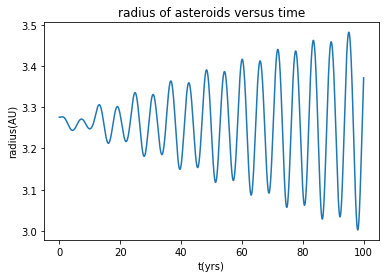

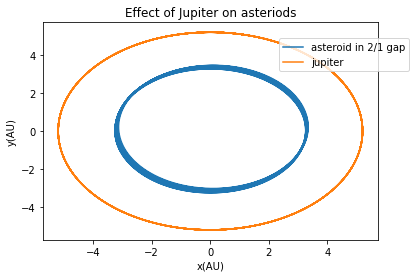

In [12]:
gap_asteroids = asteroids(3.276, 3.471, 'asteroid in 2/1 gap')
jupiter = asteroids(5.2, 2.755, 'jupiter')

motion(gap_asteroids, jupiter, maxtime = 100)
gap_asteroids.plot_radius()
gap_asteroids.plot_x_versus_y()
jupiter.plot_x_versus_y()

对于2/1 gap的小行星来说，100年的时间已经可以产生比较明显的轨道影响。可以看到其运动半径r的波动越来越大，最终会脱离。

（轨道呈椭圆是因为图像本身的x，y刻度的长度是不一致的，导致图像在水平方向上被拉伸）

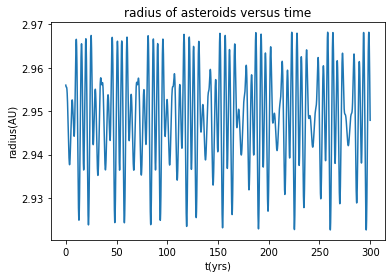

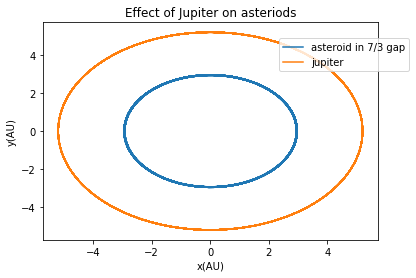

In [15]:
gap_asteroids = asteroids(2.956, 3.654, 'asteroid in 7/3 gap')
jupiter = asteroids(5.2, 2.755, 'jupiter')

motion(gap_asteroids, jupiter, maxtime = 300)
gap_asteroids.plot_radius()
gap_asteroids.plot_x_versus_y()
jupiter.plot_x_versus_y()

而对于7/3 gap的小行星来说，其半径体现出类周期行为，而这种类周期效应是混沌效应出现的一种前兆。正如教材所说，会有长时间的波动，随后会有突然性的轨道变化。这可能超出我们的计算能力，接下来的事情就交给超算完成吧。

**4.19** Study the behavior of our model for Hyperion for different initial conditions. Estimate the Lyapunov exponent from calculations of $\Delta\theta$, such as those shown in Figure 4.19. Examine how this exponent varies as a function of the eccentricity of the orbit.

# Problem 4.19

在这一题中，我们讨论土星的卫星Hyperion。其形状不是球形或类球形而是哑铃型，我们在处理时将其视为两个质量为m1与m2的球，中间以一根长杆连接在一起。在处理本题过程中，忽略太阳的影响。且本题单位以Hyperion的轨道长半轴距离***HU***为距离单位，公转周期***Hyr***为时间单位。

省去推导过程，最终我们可以得到：
$$\frac{d\omega}{dt} = - \frac{3GM_{Sat}}{r_C^5}(x_csin\theta - y_ccos\theta)(x_ccos\theta + y_csin\theta)$$

而$x_c, y_c$的变化关系为：
$$\frac{dv_x}{dt} = - \frac{GM_{Sat}x_c}{r_C^3}$$
$$\frac{dv_y}{dt} = - \frac{GM_{Sat}y_c}{r_C^3}$$

在HU及Hyr单位下，$GM_{Sat} = 4\pi^2$，上式变为：
$$\frac{d\omega}{dt} = - \frac{12\pi^2}{r_C^5}(x_csin\theta - y_ccos\theta)(x_ccos\theta + y_csin\theta)$$
$$\frac{dv_x}{dt} = - \frac{4\pi^2x_c}{r_C^3}$$
$$\frac{dv_y}{dt} = - \frac{4\pi^2x_c}{r_C^3}$$

我们的初始条件取$e = 0, x_c = 1HU, y_c = 0, \theta = 0, \omega = 0$

初始条件中, $v$可由下述公式计算：
$$v = \sqrt{\frac{GM_{Sat}(1 - e)}{r_C(1 + e)}}$$

代入$GM_{Sat} = 4\pi^2, r_C = 1$，有$v = 2\pi\sqrt{\frac{1-e}{1+e}}$

In [50]:
class Hyperion(object):
    def __init__(self, label, e = 0, x = 1, y = 0, theta = 0, omega = 0, time_step = 0.0001, maxtime = 10):
        self.x = [x]
        self.y = [y]
        self.v_x = [0]
        self.v_y = [2 * np.pi * np.sqrt((1 - e) / (1 + e))]
        self.r = [1]
        self.theta = [theta]
        self.omega = [omega]
        self.time = [0]
        self.dt = time_step
        self.maxtime = maxtime
        self.label = label
    
    def motion(self):
        for i in range(int(self.maxtime / self.dt)):
            cof = 4 * np.pi ** 2
            d_omega = -3 * cof * (self.x[-1] * np.sin(self.theta[-1]) - self.y[-1] * np.cos(self.theta[-1])) * (self.y[-1] * np.sin(self.theta[-1]) + self.x[-1] * np.cos(self.theta[-1])) / (self.r[-1] ** 5)
            self.omega.append(self.omega[-1] + self.dt * d_omega)
            self.v_x.append(self.v_x[-1] - self.dt * cof * self.x[-1] / (self.r[-1] ** 3))
            self.v_y.append(self.v_y[-1] - self.dt * cof * self.y[-1] / (self.r[-1] ** 3))
            self.theta.append(self.theta[-1] + self.omega[-1] * self.dt)
            self.x.append(self.x[-1] + self.dt * self.v_x[-1])
            self.y.append(self.y[-1] + self.dt * self.v_y[-1])
            self.r.append(np.sqrt(self.x[-1] ** 2 + self.y[-1] ** 2))
            self.time.append(self.time[-1] + self.dt)
    
    def plot_x_versus_y(self):
        plt.plot(self.x, self.y, label = self.label)
        plt.xlabel('x(AU)')
        plt.ylabel('y(AU)')
        plt.title('The orbit of Hyperion')
        plt.grid()
        plt.show()
    
    def plot_theta_versus_time_trimed(self):
        sample_theta = []
        for theta in self.theta:
            number = int((np.abs(theta) + np.pi) / (2 * np.pi))
            if(theta > 0):
                theta_new = theta - number * 2 * np.pi
            else:
                theta_new = theta + number * 2 * np.pi
            sample_theta.append(theta_new)
        plt.plot(self.time, sample_theta)
        plt.xlabel('t(Hyr)')
        plt.ylabel('theta(radius)')
        plt.title('theta of Hyperion versus time with ' + self.label)
        plt.grid()
        plt.show()
    def plot_theta_versus_time(self):
        plt.plot(self.time, self.theta)
        plt.xlabel('t(Hyr)')
        plt.ylabel('theta(radius)')
        plt.title('theta of Hyperion versus time with ' + self.label)
        plt.grid()
        plt.show()
    def plot_omega_versus_time(self):
        plt.plot(self.time, self.omega)
        plt.xlabel('t(Hyr)')
        plt.ylabel('omega(Hyr^-1)')
        plt.title('omega of Hyperion versus time with ' + self.label)
        plt.grid()
        plt.show()

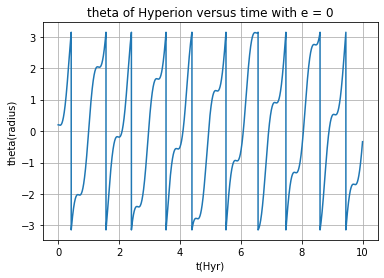

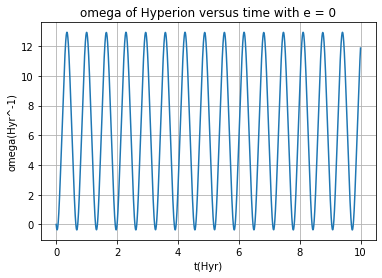

In [73]:
H1 = Hyperion('e = 0', theta = 0.2)
H1.motion()
H1.plot_theta_versus_time_trimed()
H1.plot_omega_versus_time()

可以看到，离心率e = 0时，其旋转是非常规律的。我们令e = 0.5来看一看。

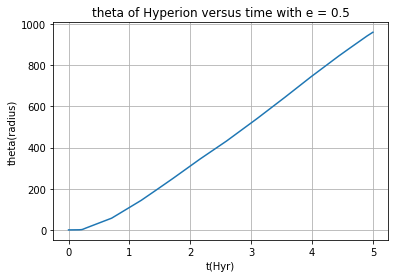

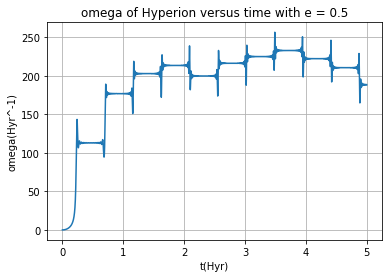

In [56]:
H2 = Hyperion('e = 0.5', e = 0.5, maxtime = 5)
H2.motion()
H2.plot_theta_versus_time()
H2.plot_omega_versus_time()

在$e = 0.5$的条件下，$\omega$总是大于0，且出现了类似于脉冲的规律；而$\theta$则在大于0的角速度作用下疯狂变化。这说明在不同的离心率下，其角速度变化并不相同。

接下来，我们来计算Lyapunov exponent $\lambda$.

In [77]:
def Lyapunov_exponent(H1, H2):
    d_theta = np.abs(np.asarray(H1.theta) - np.asarray(H2.theta))
    ln_d_theta = np.log(d_theta)
    max_theta = []
    max_time = []
    
    for i in range(1, len(ln_d_theta) - 1):
        if(ln_d_theta[i] >= ln_d_theta[i - 1] and ln_d_theta[i] >= ln_d_theta[i + 1]):
            max_theta.append(ln_d_theta[i])
            max_time.append(H1.time[i])

    plt.plot(max_time, max_theta, 'ro')
    lambda_list = np.polyfit(max_time, max_theta, 1)

    fit_y = []
    fit_x = []
    for pp in np.arange(0, H1.maxtime, 0.1):
        fit_x.append(pp)
        fit_y.append(lambda_list[0] * pp + lambda_list[1])
    plt.plot(fit_x, fit_y, 'g--', label = 'ln(d_theta) = {:.6f}t + {:.1f}'.format(lambda_list[0], lambda_list[1]))
    plt.legend()
    plt.plot(H1.time, ln_d_theta)
    plt.xlabel("time / Hyr")
    plt.ylabel("delta theta / radians")
    plt.title("the difference between two system versus time with " + H1.label)
    plt.grid()
    plt.show()

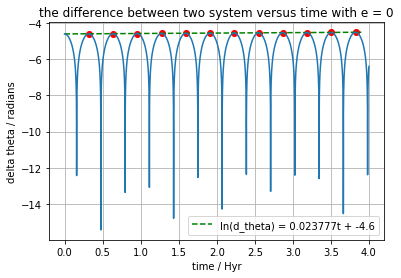

In [78]:
H3 = Hyperion('e = 0', maxtime = 4)
H4 = Hyperion('e = 0', theta = 0.01, maxtime = 4)
H3.motion()
H4.motion()

Lyapunov_exponent(H3, H4)

我们发现此时的$\lambda = 0.0237777$大于0，说明该系统是处于混沌状态的。但是这种混沌状态非常小，以至于我们在上面的$\omega-t$图像中并不能看出。

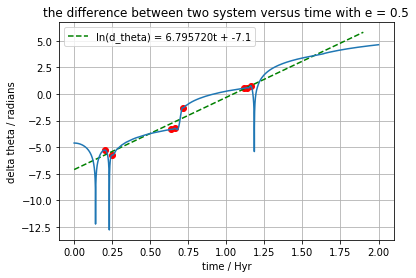

In [79]:
H3 = Hyperion('e = 0.5', e = 0.5, maxtime = 2)
H4 = Hyperion('e = 0.5', e = 0.5, theta = 0.01, maxtime = 2)
H3.motion()
H4.motion()

Lyapunov_exponent(H3, H4)

当$e = 0.5$时， $\lambda$更加的大，说明该系统处于明显的混沌状态。接下来我们画$\lambda-e$的图像

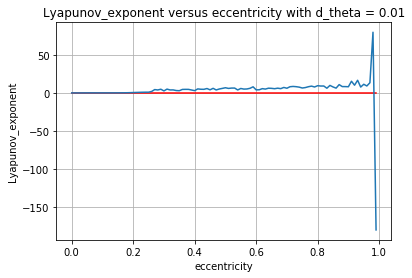

In [88]:
def Lyapunov_exponent_noplot(H1, H2):
    d_theta = np.abs(np.asarray(H1.theta) - np.asarray(H2.theta))
    ln_d_theta = np.log(d_theta)
    max_theta = []
    max_time = []
    
    for i in range(1, len(ln_d_theta) - 1):
        if(ln_d_theta[i] >= ln_d_theta[i - 1] and ln_d_theta[i] >= ln_d_theta[i + 1]):
            max_theta.append(ln_d_theta[i])
            max_time.append(H1.time[i])
    lambda_list = np.polyfit(max_time, max_theta, 1)
    return lambda_list[0]

lambda_list = []
for i in np.arange(0, 1, 0.01):
    H3 = Hyperion('', e = i, maxtime = 2)
    H4 = Hyperion('', e = i, theta = 0.01, maxtime = 2)
    H3.motion()
    H4.motion()
    cof = Lyapunov_exponent_noplot(H3, H4)
    lambda_list.append(cof)
    

zeros = np.zeros(len(np.arange(0, 1, 0.01)))
plt.plot(np.arange(0, 1, 0.01), zeros, 'r')

plt.plot(np.arange(0, 1, 0.01), lambda_list)
plt.xlabel('eccentricity')
plt.ylabel('Lyapunov_exponent')
plt.title('Lyapunov_exponent versus eccentricity with d_theta = 0.01')
plt.grid()
plt.show()

可以看到，除了最后一个数据点，其他点的$\lambda$值均大于0，说明整个系统总是混沌的。关于最后两个数据点的异常现象，请看下面的图：

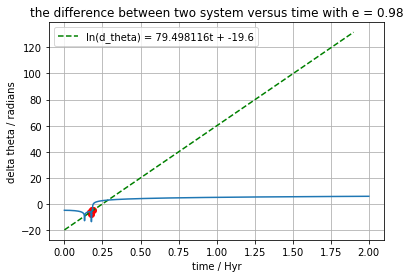

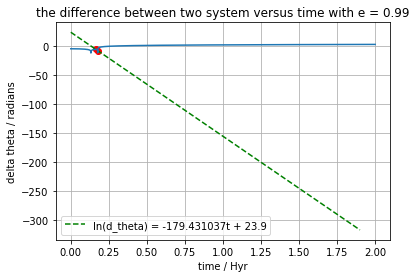

In [91]:
H3 = Hyperion('e = 0.98', e = 0.98, maxtime = 2)
H4 = Hyperion('e = 0.98', e = 0.98, theta = 0.01, maxtime = 2)
H3.motion()
H4.motion()

Lyapunov_exponent(H3, H4)

H3 = Hyperion('e = 0.99', e = 0.99, maxtime = 2)
H4 = Hyperion('e = 0.99', e = 0.99, theta = 0.01, maxtime = 2)
H3.motion()
H4.motion()

Lyapunov_exponent(H3, H4)

当$e = 0.98, e = 0.99$时， 可以用于拟合的数据点只有少数几个，从而导致出现了异常的数据。我们可以去除这两个点，将前面的图像画出来。

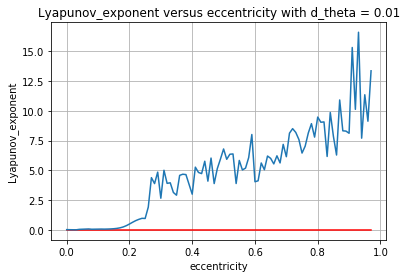

In [92]:
lambda_list = []
for i in np.arange(0, 0.98, 0.01):
    H3 = Hyperion('', e = i, maxtime = 2)
    H4 = Hyperion('', e = i, theta = 0.01, maxtime = 2)
    H3.motion()
    H4.motion()
    cof = Lyapunov_exponent_noplot(H3, H4)
    lambda_list.append(cof)
    

zeros = np.zeros(len(np.arange(0, 0.98, 0.01)))
plt.plot(np.arange(0, 0.98, 0.01), zeros, 'r')

plt.plot(np.arange(0, 0.98, 0.01), lambda_list)
plt.xlabel('eccentricity')
plt.ylabel('Lyapunov_exponent')
plt.title('Lyapunov_exponent versus eccentricity with d_theta = 0.01')
plt.grid()
plt.show()

可以看到，随着离心率的增大，$\lambda$值是在增大的，系统变得越来越混沌。